In [1]:
import os
import ast
import logging
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm
from collections import Counter
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [2]:
# graph = nx.read_graphml("../../../Starspace/data/swiki/cat_hier_graph.graphml", node_type=int)
graph = nx.read_graphml("../../../Starspace/data/oms/cat_hier_TREE.graphml")
# graph = nx.read_edgelist("../../../Starspace/data/swiki/cat_hier.txt", nodetype=int, create_using=nx.DiGraph)
# graph = nx.read_edgelist("../swiki/data/cat_hier.txt", nodetype=int, create_using=nx.DiGraph)

In [3]:
prep_df = pd.read_csv("../../../Starspace/data/oms/text/oms-prep.tsv", sep="\t")

In [4]:
prep_df = prep_df.dropna()
prep_df = prep_df.reset_index()

In [5]:
prep_df.head()

,index,abstract,file_id,label_id,labels,used_as,doc_len,doc
0,0,Integral membrane proteins deform the surround...,ArXiv:0001001v1,[192554569],['Biomolecules'],training,98,membran deform surround bilay creat rang forc ...
1,1,We show that we can know more than the orthodo...,ArXiv:0001002v1,[170589438],['Physics'],training,25,know orthodox view doe slit pass slit destroy ...
2,2,The algebraic geometric approach to $N$-compon...,ArXiv:0001003v1,[342949543],['Physical Pattern Formation'],training,41,integr pde kdv dym detail soliton fission kink...
3,3,The new method for producing of the polarized ...,ArXiv:0001004v1,[254830662],['Accelerator Physics'],training,59,produc polar relativist positron suggest unpol...
4,4,The emission of electromagnetic waves from a s...,ArXiv:0001005v1,[342949527],['Physics Education'],training,105,electromagnet trivial with boundari crystallin...


In [6]:
prep_df["labels"] = prep_df["labels"].apply(lambda x: ast.literal_eval(x))

In [7]:
prep_df["labels"] = prep_df["labels"].apply(lambda x: [i.lower().replace(" ", "-") for i in x])

In [8]:
prep_df["label_len"] = prep_df["labels"].apply(lambda x: len(x))

In [10]:
prep_labels = list(prep_df["labels"])

In [11]:
label_used_in_dataset = set()
for label_list in tqdm(prep_labels):
    for label in label_list:
        label_used_in_dataset.add(label)        

In [12]:
leaves = [n for n in graph.nodes() if len(list(graph.successors(n)))==0]

In [13]:
len(label_used_in_dataset), len(set(label_used_in_dataset).intersection(leaves))

(1023, 886)

In [90]:
type(list(graph.nodes())[0])

str

In [92]:
# 1. Label ids vs. number of labels
class_distb = Counter()
all_class_labels = []

for label in prep_labels:
    for item in label:
        class_distb[item]+=1
        all_class_labels.append(item)

class_distb = sorted(class_distb.items(), key=lambda x: x[1], reverse=True)

In [93]:
kk = [k[0] for k in class_distb]
vv = [k[1] for k in class_distb]

In [94]:
kk_str = list(map(str, kk))

In [111]:
len(kk)

1023

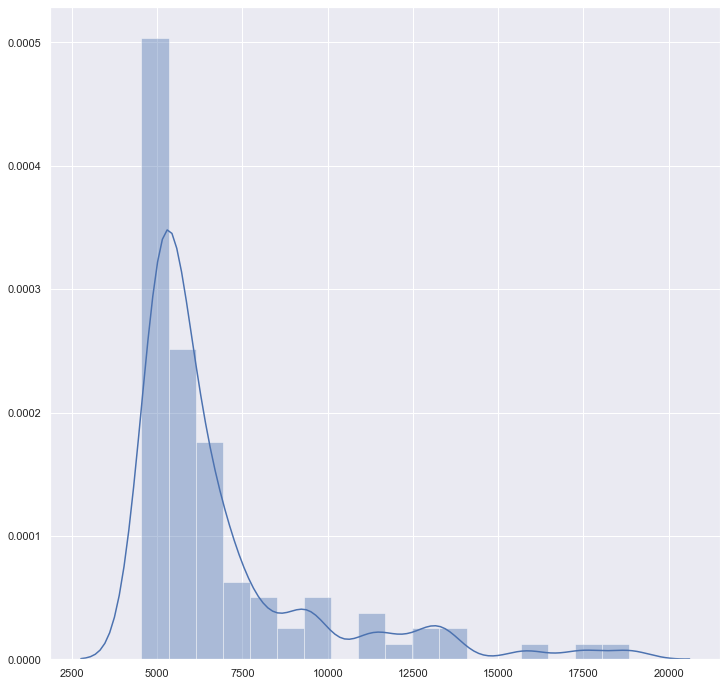

In [142]:
sns.set(color_codes=True)
plt.figure(figsize=(12,12)) 
sns.distplot(vv[:100]);

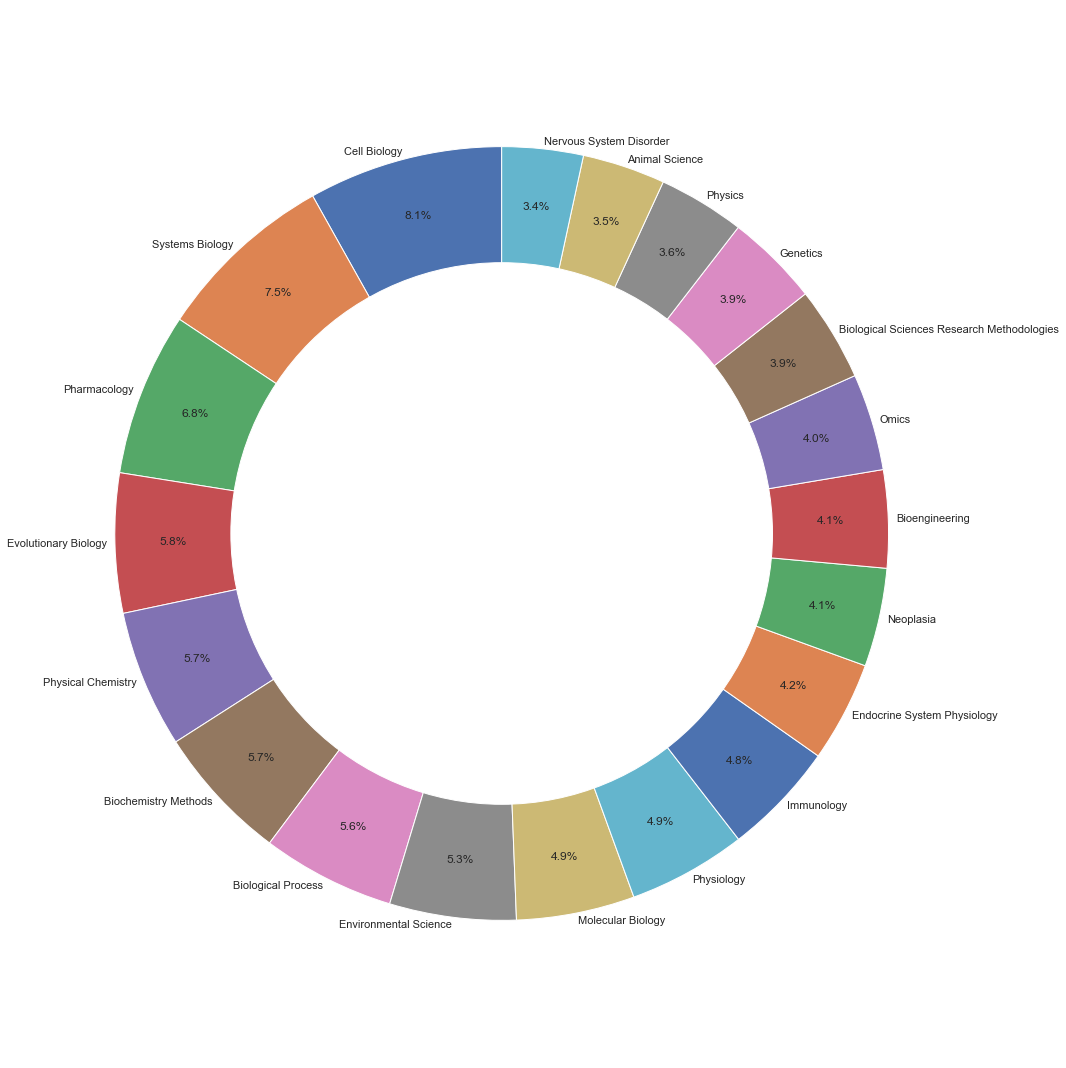

In [144]:
# plt.xlabel("Number of labels")
# plt.ylabel("Labels")
# plt.title("Top 20")
# plt.tight_layout();

fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(vv[:20], labels=kk[:20],startangle=90,  autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.02)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()
plt.savefig("oms_class_distb.png")

In [248]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18

def class_statistics(df, name, show):
    '''
    statistics display
    <df> : pandas df
    <name> : df name, str
    <show> : plot-show, bool
    '''
    if name == 'omniscience':
        col = "labels"
    else:
        # TODO: check column name again for other datasets
        col = "label"

#     labels = df[col].apply(lambda x: ast.literal_eval(x))
    # 1. Label ids vs. number of labels
    class_distb = Counter()
    
    class_labels = list(labels)
    
    for label in class_labels:
        for item in label:
            class_distb[item]+=1

    class_distb = sorted(class_distb.items(), key=lambda x: x[1], reverse=True)

    kk = [k[0] for k in class_distb]
    vv = [k[1] for k in class_distb]
    
    cmap = plt.cm.summer
    colors = cmap(np.linspace(0., 1., len(vv[:22])))[2:]
    
    if show:
        fig1, ax1 = plt.subplots(figsize=(15,15))
        patches, texts, autotexts = ax1.pie(vv[:20], labels=kk[:20],startangle=90, 
                                            autopct='%1.1f%%', pctdistance=0.85, 
                                            labeldistance=1.02, colors = colors)
        for i in range(20):
            texts[i].set_fontsize(14)

        #draw circle
#         centre_circle = plt.Circle((0,0),0.05,fc='white')
#         fig = plt.gcf()
#         fig.gca().add_artist(centre_circle)

        ax1.axis('equal')  
        plt.tight_layout()
        plt.savefig("OMS_class_distb.png")
        plt.show()


    # 2. Number of labels per instance (label counts vs. number of instances)
    label_dist = Counter()

    label_len = list(labels.apply(lambda x: len(x)))
    
    for cnt in label_len:
        label_dist[cnt]+=1

    label_dist = sorted(label_dist.items(), key = lambda _: _[0], reverse = False )

    kkk = [k[0] for k in label_dist]
    vvv = [k[1] for k in label_dist]
    
    kkk_str = list(map(str, kkk))
    if show:
        plt.figure(figsize=(12,8))
        plt.bar(x = kkk_str[1:20], height = vvv[1:20], color=colors)
        plt.xlabel("Count of labels")
        plt.ylabel("Number of instances")
        plt.title("Decreasing order (count 1 excluded)")
        plt.tight_layout()
        plt.savefig("oms_label_distb.png")
        plt.show()


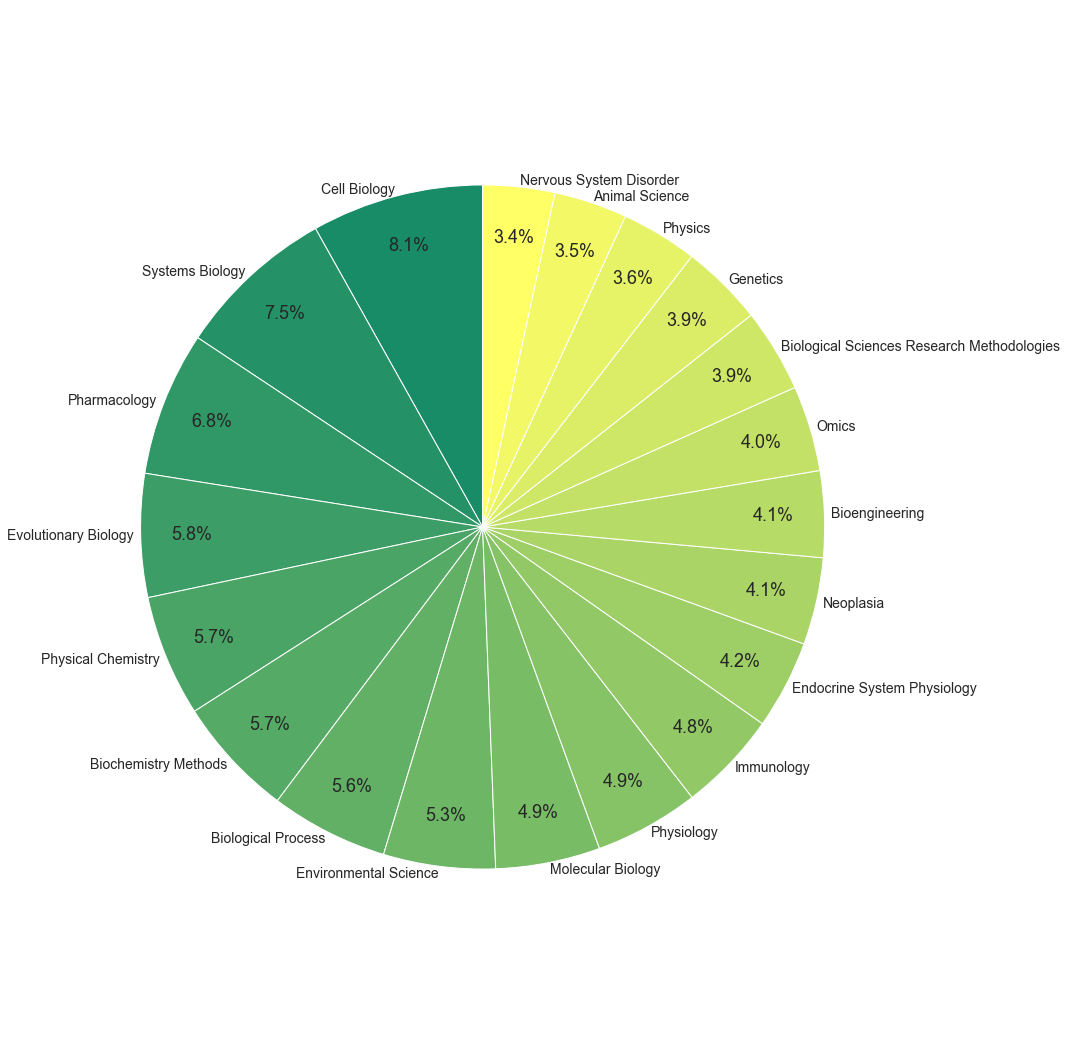

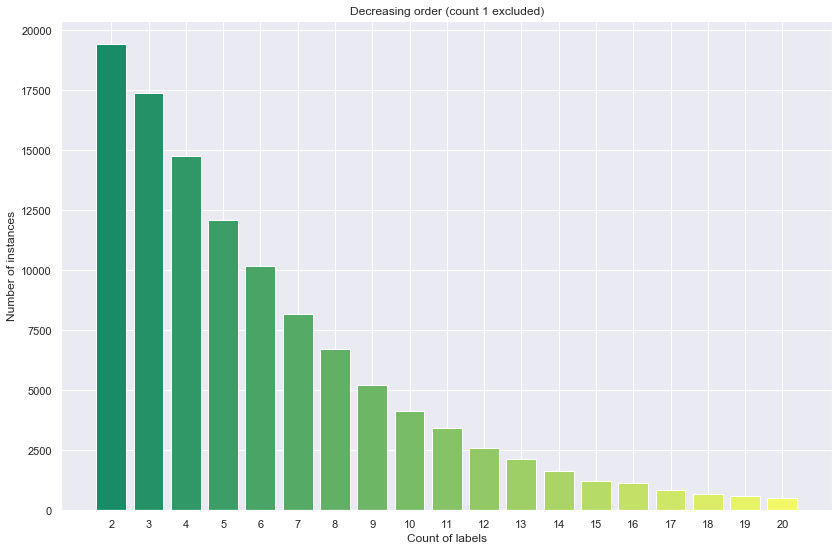

In [250]:
class_statistics(prep_df, "omniscience", True)